# Resampling and Interpolation

The Pandas library provides the capability to change the frequency of time series data. 

Two types of resampling are:
- **Upsampling**: Increase the frequency, such as going from minutes to seconds
- **Downsampling**: Decrease the frequency, such as going from days to months

In both cases data must be invented. In the case of upsampling, care is needed in determining how the finer-grained observations are calculated using interpolation. In the case of downsampling, care is needed in selecting the summary statistics used to aggregate the values.

Why resample?

1. Your data is not available at the same frequency that you want to make predictions.
2. Provide additional structure or insight (feature engineering)

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [3]:
series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0,
                 parse_dates=True, squeeze=True, date_parser=parser)
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

In [4]:
series.tail()

Month
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

## Upsampling Data

In [5]:
upsampled = series.resample('D').mean()
upsampled.head(32)

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
Freq: D, Name: Sales, dtype: float64

As the original data existed at a frequency of once a month, upsampling to once a day leaves a lot of null values. 

These null values can be interpolated using the `interpolate()` function. There are many ways these values can be interpolated. A good starting point is to use a linear interpolation.

In [6]:
import matplotlib.pyplot as plt

interpolated = upsampled.interpolate(method='linear')
interpolated.head()

Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
Freq: D, Name: Sales, dtype: float64

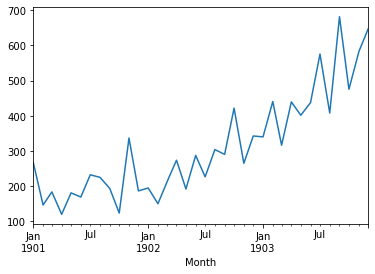

In [7]:
interpolated.plot()
plt.show()

There would be no difference in a line plot of the original data and a line plot of this interpolated data because the method was linear. Other methods would result in a different plot.

Another common method is to use a polynomial or a spline to connect the values. Using a spline interpolation requires you specify the order of the polynomial. 

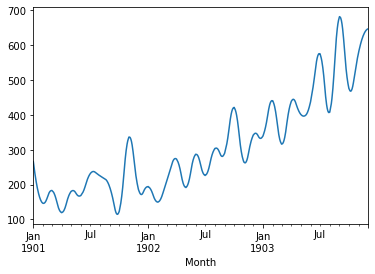

In [8]:
interpolated = upsampled.interpolate(method='spline', order=2)
interpolated.plot()
plt.show()

In [9]:
interpolated.head()

Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
Freq: D, Name: Sales, dtype: float64

## Downsampling

We can again use the `resample()` function from pandas to group all observations by a new, lower frequency. With a lower frequency, we must also provide an aggregate method by which to consolidate many rows of data into fewer rows. 

In [10]:
resample = series.resample('Q') # Resampled to quarterly frequency
resample

In [11]:
quarterly_mean_sales = resample.mean()
quarterly_mean_sales.head()

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
Freq: Q-DEC, Name: Sales, dtype: float64

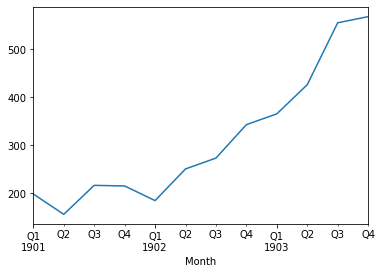

In [12]:
quarterly_mean_sales.plot()
plt.show()

We can go further and resample at a yearly frequency:

Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Freq: A-DEC, Name: Sales, dtype: float64


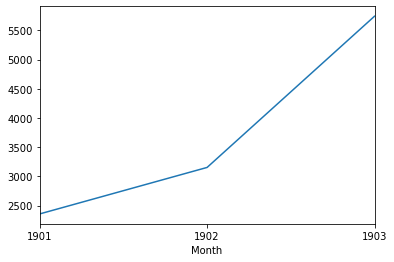

In [13]:
resample = series.resample('A')
yearly_total_sales = resample.sum()
print(yearly_total_sales.head())
yearly_total_sales.plot()
plt.show()